In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## 1. Load Data
Loading the preprocessed dataset.

In [2]:
df = pd.read_csv('../datasets/m5_walmart_hobbies_daily.csv', parse_dates=['timestamp'], index_col='timestamp')
print(df.head())
print(df.info())
print(df.describe())

            sales event_name_1 event_type_1  wday  month  year  snap_total
timestamp                                                                 
2011-01-29   3764      NoEvent      NoEvent     1      1  2011           0
2011-01-30   3357      NoEvent      NoEvent     2      1  2011           0
2011-01-31   2682      NoEvent      NoEvent     3      1  2011           0
2011-02-01   2669      NoEvent      NoEvent     4      2  2011           2
2011-02-02   1814      NoEvent      NoEvent     5      2  2011           2
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1941 entries, 2011-01-29 to 2016-05-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sales         1941 non-null   int64 
 1   event_name_1  1941 non-null   object
 2   event_type_1  1941 non-null   object
 3   wday          1941 non-null   int64 
 4   month         1941 non-null   int64 
 5   year          1941 non-null   int64 
 6   snap_total

## 2. Time Series Plot
Visualizing the Sales over time.

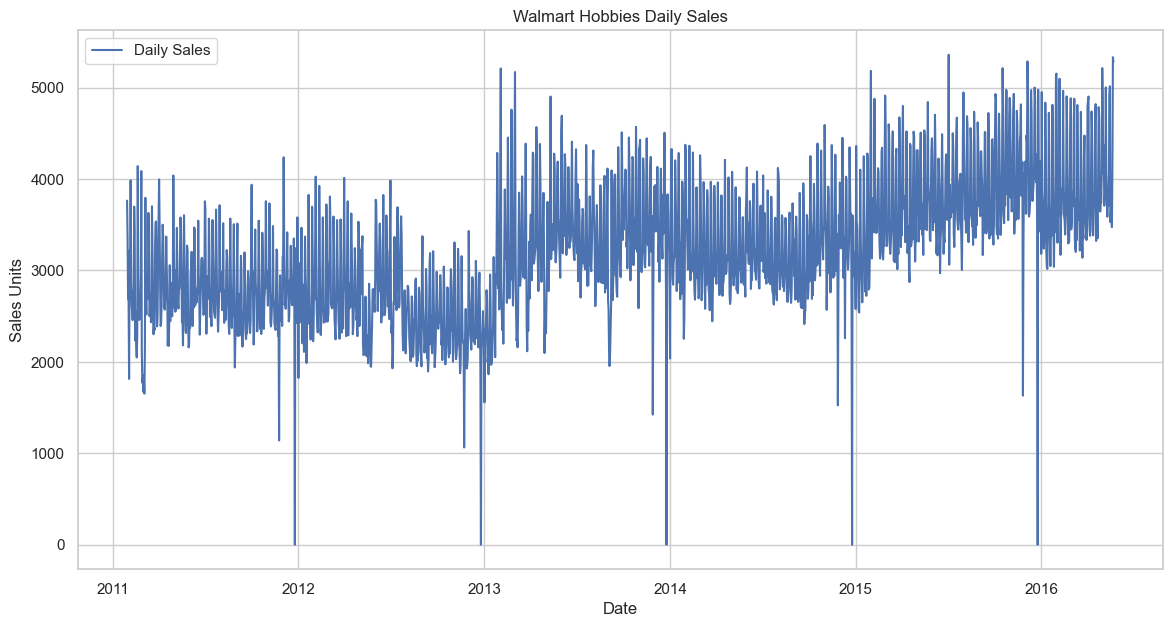

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['sales'], label='Daily Sales')
plt.title('Walmart Hobbies Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales Units')
plt.legend()
plt.show()

## 3. Decomposition
Decomposing the time series into trend, seasonal, and residual components.
Since this is **daily data**, we use a period of **7** to capture weekly seasonality.

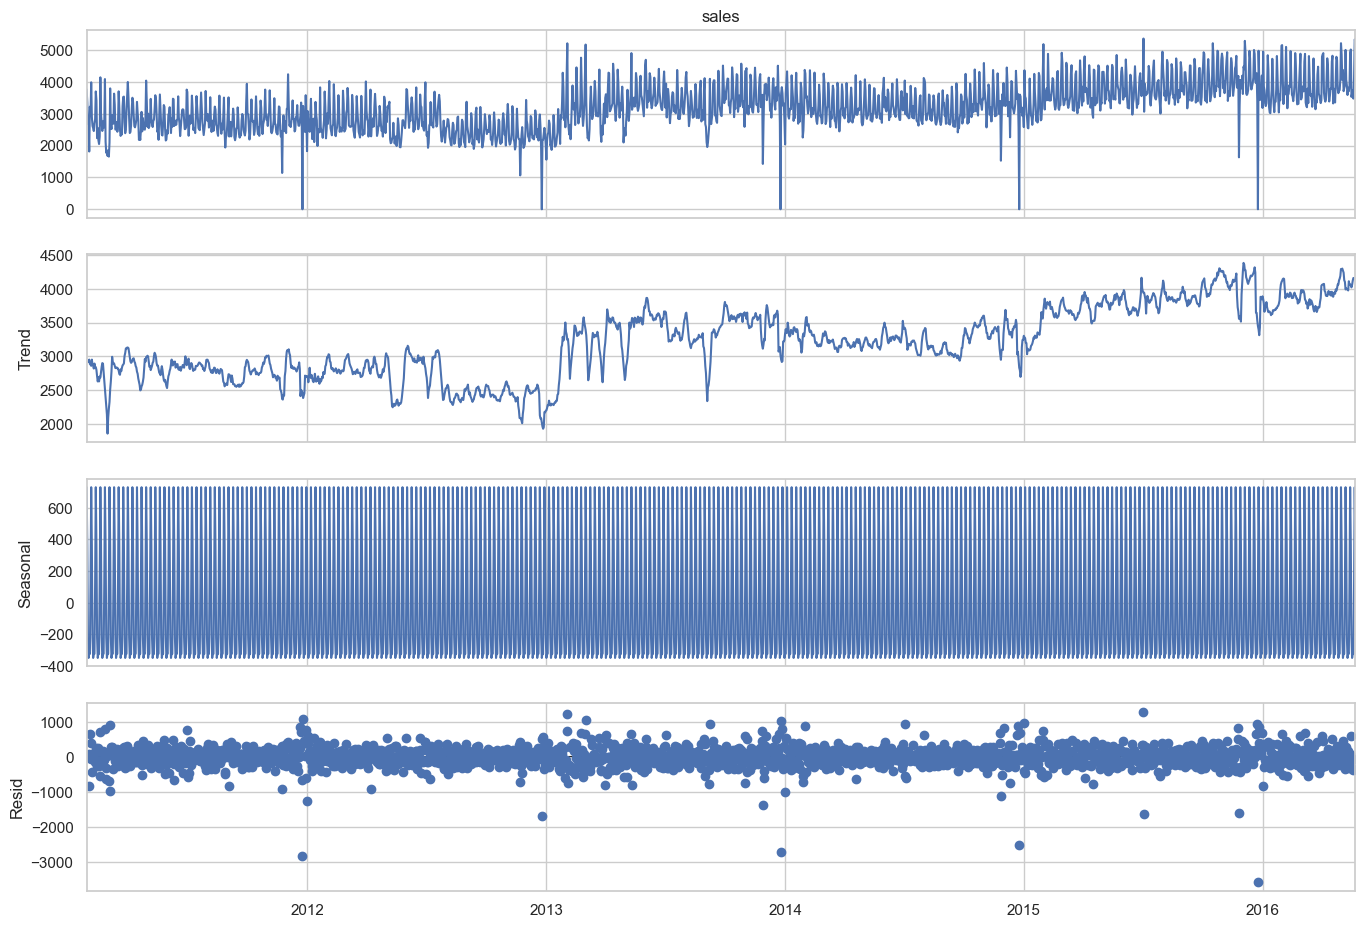

In [4]:
# Decompose the time series
# period=7 for daily data (weekly seasonality)
decomposition = seasonal_decompose(df['sales'], model='additive', period=7)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

## 4. Autocorrelation and Partial Autocorrelation
Checking for serial correlation in the data.

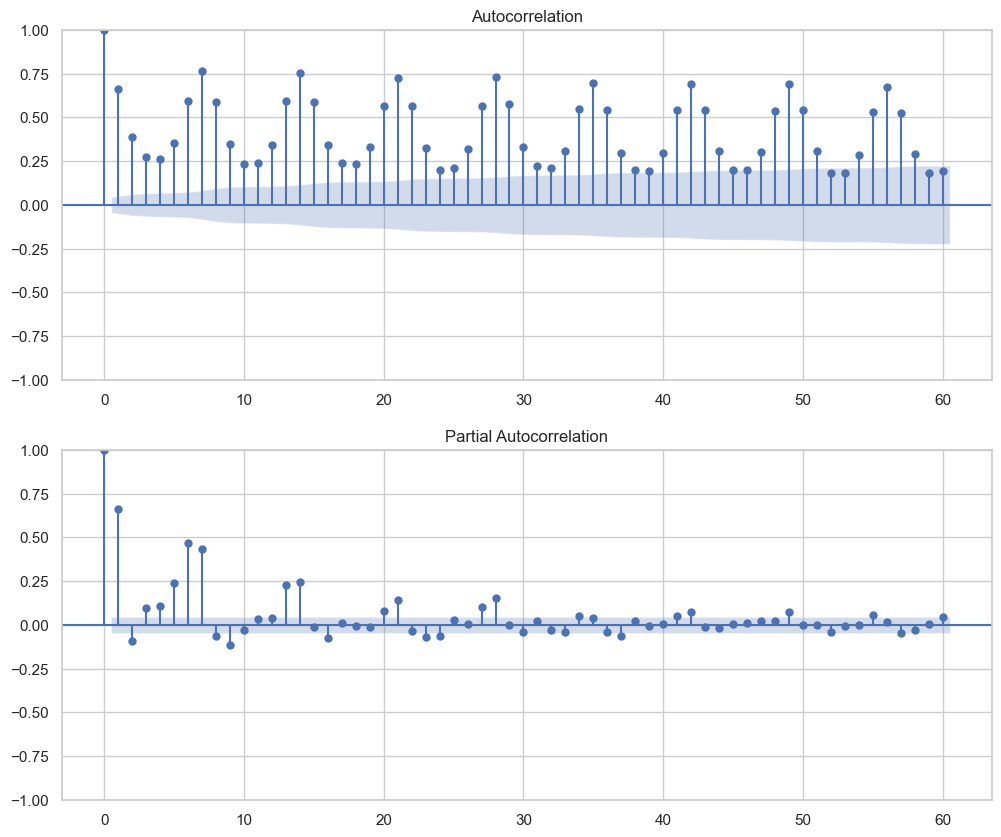

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(df['sales'], ax=ax[0], lags=60)
plot_pacf(df['sales'], ax=ax[1], lags=60, method='ywm')
plt.show()

## 5. Distribution of Data
Checking the distribution of sales.

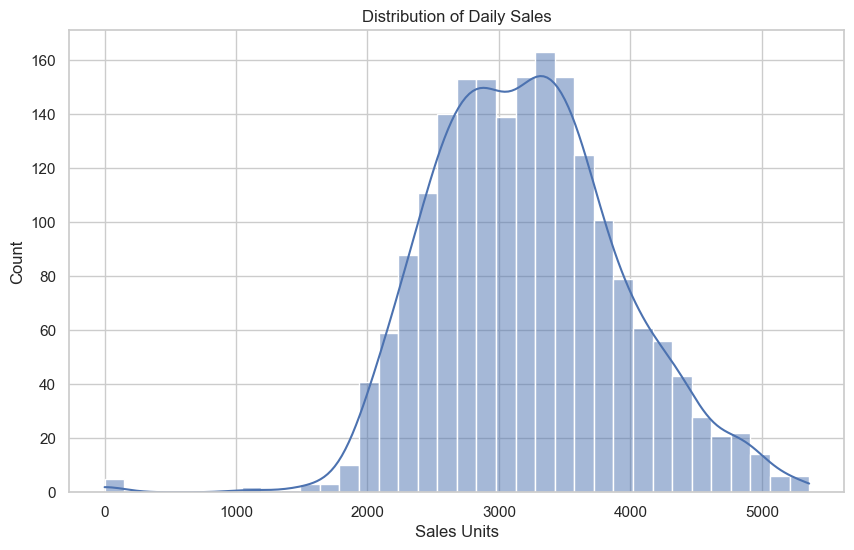

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], kde=True)
plt.title('Distribution of Daily Sales')
plt.xlabel('Sales Units')
plt.show()

## 6. Stationarity Test (ADF Test)
Checking if the time series is stationary.

In [7]:
result = adfuller(df['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

if result[1] < 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

ADF Statistic: -1.6855612795282189
p-value: 0.4385666729593313
Critical Values:
	1%: -3.4337711555892523
	5%: -2.8630512450631986
	10%: -2.567574528530358
Fail to reject the null hypothesis. Data is non-stationary.


## 7. Differencing (if non-stationary)
If the data is non-stationary, we look at the first difference.

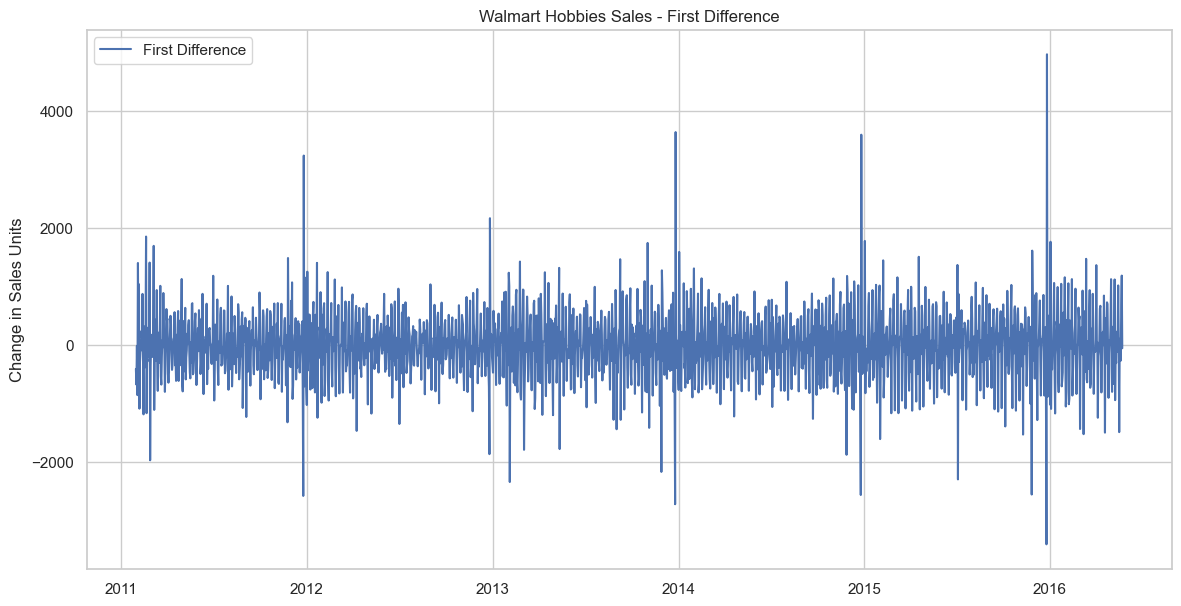

ADF Statistic (Diff): -14.56485385242588
p-value (Diff): 4.7300399548460766e-27


In [8]:
df['sales_diff'] = df['sales'].diff()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['sales_diff'], label='First Difference')
plt.title('Walmart Hobbies Sales - First Difference')
plt.ylabel('Change in Sales Units')
plt.legend()
plt.show()

# Check stationarity of differenced data
df_diff = df['sales_diff'].dropna()
result_diff = adfuller(df_diff)
print('ADF Statistic (Diff):', result_diff[0])
print('p-value (Diff):', result_diff[1])